In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [78]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [79]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
X = df.drop(columns='charges')

In [81]:
Y = df.drop(columns= ['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [85]:
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [86]:
lr.fit(X_train, Y_train)

LinearRegression()

In [87]:
c = lr.intercept_
c

array([-11827.7331418])

In [88]:
m = lr.coef_
m

array([[  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
        23400.28378787,  -276.31576201]])

In [89]:
y_pred_train = lr.predict(X_train)

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

C:\Users\RTECH\AppData\Local\Temp\ipykernel_11208\3231699638.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


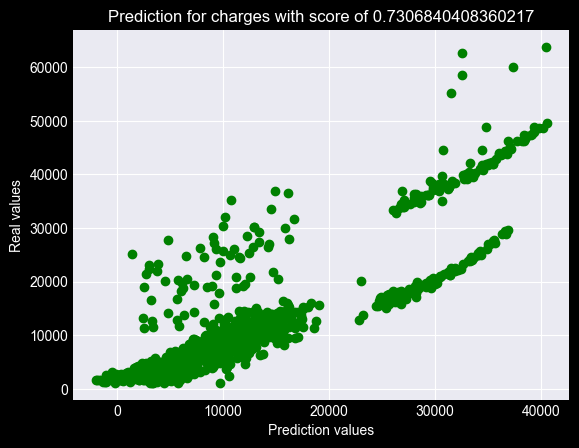

In [104]:
plt.scatter(y_pred_train, Y_train, c='green', marker='o', label='Puntos de datos')
plt.gcf().set_facecolor('black')
plt.title(f'Prediction for charges with score of {r2_score(Y_train, y_pred_train)}', color='white')
plt.ylabel('Real values', color='white')
plt.xlabel('Prediction values', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.show()